# Redes Neuronales Convolucionales

Una red neuronal convolucional CNN es una de las ANN más comunes y usadas actualmente. Este tipo de red es una variación de un MLP, sin embargo, debido a que su aplicación es realizada en matrices bidimensionales, son muy efectivas para tareas de visión por computador, especificamente en tareas de clasificación y segmentación de imágenes.

![](https://miro.medium.com/max/1200/1*3DUs-90altOgaBcVJ9LTGg.png)


# Ejercicio

Diseñar una CNN para resolver un problema de clasificación de imágenes.

In [ ]:
#-- Descomprimimos el dataset
# !rm -r mnist
!unzip /content/drive/MyDrive/Colab/IntroDeepLearning_202102/mnist.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: mnist/train/5/2413.png  
  inflating: mnist/train/5/2445.png  
  inflating: mnist/train/5/2452.png  
  inflating: mnist/train/5/2460.png  
  inflating: mnist/train/5/2476.png  
  inflating: mnist/train/5/2487.png  
  inflating: mnist/train/5/2515.png  
  inflating: mnist/train/5/2518.png  
  inflating: mnist/train/5/2525.png  
  inflating: mnist/train/5/2526.png  
  inflating: mnist/train/5/2540.png  
  inflating: mnist/train/5/2545.png  
  inflating: mnist/train/5/2546.png  
  inflating: mnist/train/5/2554.png  
  inflating: mnist/train/5/2556.png  
  inflating: mnist/train/5/2558.png  
  inflating: mnist/train/5/2559.png  
  inflating: mnist/train/5/2569.png  
  inflating: mnist/train/5/2573.png  
  inflating: mnist/train/5/2574.png  
  inflating: mnist/train/5/2581.png  
  inflating: mnist/train/5/2586.png  
  inflating: mnist/train/5/2597.png  
  inflating: mnist/train/5/2604.png  
  inflating: mnist/tr

In [ ]:
#--- Buscamos las direcciones de cada archivo de imagen
from glob import glob

train_files = glob('./mnist/train/*/*.png')
valid_files = glob('./mnist/valid/*/*.png')
test_files = glob('./mnist/test/*/*.png')

train_files[0]

'./mnist/train/4/8264.png'

In [ ]:
#--- Ordenamos los datos de forma aleatoria para evitar sesgos
import numpy as np

np.random.shuffle(train_files)
np.random.shuffle(valid_files)
np.random.shuffle(test_files)

len(train_files), len(valid_files), len(test_files)

(6000, 2000, 992)

In [ ]:
#--- Cargamos los datos de entrenamiento en listas
from PIL import Image

N_train = len(train_files)
X_train = []
Y_train = []

for i, train_file in enumerate(train_files):
  Y_train.append( int(train_file.split('/')[3]) )
  X_train.append(np.array(Image.open(train_file)))

In [ ]:
#--- Cargamos los datos de validación en listas
N_valid = len(valid_files)
X_valid = []
Y_valid = []

for i, valid_file in enumerate(valid_files):
  Y_valid.append( int(valid_file.split('/')[3]) )
  X_valid.append( np.array(Image.open(valid_file)) )

In [ ]:
#--- Cargamos los datos de testeo en listas
N_test = len(test_files)
X_test = []
Y_test = []

for i, test_file in enumerate(test_files):
  Y_test.append( int(test_file.split('/')[3]) )
  X_test.append( np.array(Image.open(test_file)) )

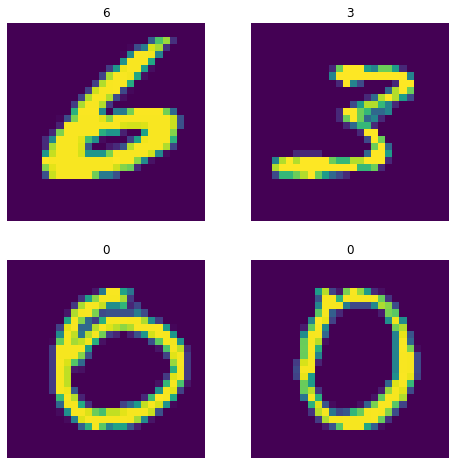

In [ ]:
#-- Visualizamos los datos
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(X_test[i*15])
  plt.title(Y_test[i*15])
  plt.axis(False)
plt.show()

In [ ]:
#--- Convetimos las listas con los datos a tensores de torch
import torch
from torch.autograd import Variable


X_train = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

X_train.data.size()

torch.Size([6000, 28, 28])

In [ ]:
import torch

batch_size = 32

train_ds = torch.utils.data.TensorDataset(X_train, Y_train)
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)

# Capas de una CNN


#Capas Convolucionales

A diferencia de las capas densamente conectadas (**Linear**) las redes convolucionales se componen principalmente de capas de convolución que reciben como parámetro de entrada el número de canales que componen el mapa bidimensional (en el caso de la primera capa convolucional es la imagen original). Para imágenes en escala de gris, en numero de canales es 1. En el caso de imágenes a color se podría trata de 3 (RGB) o 4 (RGBA) canales. La salida de una capa convolucional son un número de canales seleccionado. Cada canal tiene un mapa de características asociado y se obtiene al aplicar un kernel (filtro) sobre el mapa de entrada.

## Kernel 
**Ejemplo**: 

* *Input (x)*: 3x3
* *Kernel (w)*: 2x2
* *Output (z)*: 2x2

El kernel hace una convolución por toda la imagen, de izquierda a derecha y de arriba a abajo, de modo que la salida es un mapa de características bidimensional donde en valor de cada entrada del mapa corresponde al producto $w*x$. Así por ejemplo, 0x0+ 1x1 + 2x3 + 4x3 = 19.

![](https://classic.d2l.ai/_images/correlation.svg)

Los kernel son definidos aleatoriamente por Pytorch, sin embargo, es posible pasarle un filtro específico para efectuar la convolución.

## Padding

De acuerdo al ejemplo de la imagen anterior al realizar la convolución, el tamaño del mapa de salida es menor que el tamaño del de entrada. Para evitar esta perdida de información en los bordes se puede utilizar el parametro *padding*. Este parámetro agrega información en los bordes, de modo que al pasar el kernel sobre todo el mapa, se recupera el tamaño inicial. El contenido de estos bordes extra depende del parámetro *padding_mode*, que toma por defecto el valor 'zeros'. En la imagen de ejemplo se aplica un padding igual a 1 y se utilizan ceros como valores por defecto. Más infromación [aquí](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html).

![](https://classic.d2l.ai/_images/conv-pad.svg)


## Stride

Otro parámetro importante en la capa convolucional es el espacio entre cada aplicación del kernel, el kernel por defecto y luego de ejecutado, salta hacia la derecha un paso. Cuando termina horizontalmente, hace un salto vertical arrancando nuevamente desde la izquierda, así hasta barrer toda la imagen. 
El valor de estos saltos horizontales y verticales se puede definir usando el parámetro *stride*. En la imagen de ejemplo se aplica un stride de la forma (2,3), dando como resultado una salida de tamaño 2x2. 

![](https://classic.d2l.ai/_images/conv-stride.svg)


# Max Pooling y Global Average Pooling

La idea detrás de la técnica *Pooling* es perder resolución en la imagen para obtener las características más representativas de la imagen. El *max pooling* consiste en tomar el valor máximo de un kernel de *pooling* proyectáándolo en el mapa de salida. Una variedad de este método consiste en tomar el promedio global del kernel y no el máximo. El uso de técnicas de *pooling* se sustenta también en la disminución del número de características en la red.

![](https://classic.d2l.ai/_images/pooling.svg)

# Calculo del número de características 

Para calcular el tamaño de los mapas de características y el número total de característica de la red se usa la siguiente ecuación.

$$\large{ \frac{W - F + 2P}{S} + 1 }$$

Donde $W$ es el tamaño del ancho del mapa de características, $F$ el tamaño del kernel, $P$ el valor de padding y $S$ el valor del stride. De esta forma y utilizando la ecuación anterior en cada capa se puede controlar el tamaño de características en cada capa.

_(Imágenes tomadas de: Dive into Deep Learning - Aston Zhang, Zachary C. Lipton, Mu Li, and Alexander J. Smola)_

# Dropout

Durante el entrenamiento es posible convertir algunos pesos en nulos, de modo que la red no aprenda las mismas conexiones en cada entrenamiento, si no que trate de encontrar diferentes caminos dentro de la red y así garantizar un aprendizaje más general.

Esta es una técnica de regularización que previene la adaptación de las neuronas.


![](https://www.researchgate.net/publication/336754568/figure/fig3/AS:817383757328385@1571890882529/The-difference-between-standard-NN-and-Dropout-NN-53-Dropout-method-randomly-drops.ppm)

In [ ]:
#--- Definimos la CNN

model = torch.nn.Sequential(
  torch.nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
  # ( (28-5+2*2)/1 ) + 1 = 28   -> 28*28*16

  torch.nn.ReLU(),

  torch.nn.MaxPool2d(kernel_size=2),
  # 28/2 = 14                 -> 14*14*16

  torch.nn.Dropout(p=0.2),

  torch.nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
  # ( (14-5+2*2)/1 ) + 1 = 14   -> 14*14*32

  torch.nn.ReLU(),

  torch.nn.MaxPool2d(kernel_size=2),
  # 14/2 = 7                 -> 7*7*32

  torch.nn.Dropout(p=0.2), 

  torch.nn.Flatten(),
  torch.nn.Linear(7*7*32, 10)
)
model

Sequential(
  (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Dropout(p=0.2, inplace=False)
  (4): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (5): ReLU()
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Dropout(p=0.2, inplace=False)
  (8): Flatten(start_dim=1, end_dim=-1)
  (9): Linear(in_features=1568, out_features=10, bias=True)
)

In [ ]:
#--- Definimos los criterios de evaluación y el optmizador

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001, weight_decay=0.1)

# Hidden Layer

In [ ]:
!pip install hiddenlayer

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/torch/onnx/symbolic_helper.py:715: UserWarning: ONNX export mode is set to inference mode, but operator dropout is set to training  mode. The model will be exported in inference, as specified by the export mode.
  training_mode + ", as specified by the export mode.")


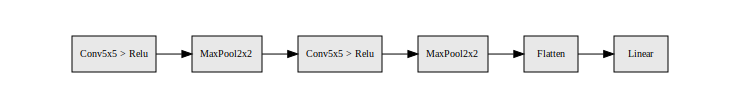

In [ ]:
#--- Visualizamos la estructura de nuestra CNN

import hiddenlayer as hl

hl.build_graph(model, torch.zeros([32,1,28,28]))

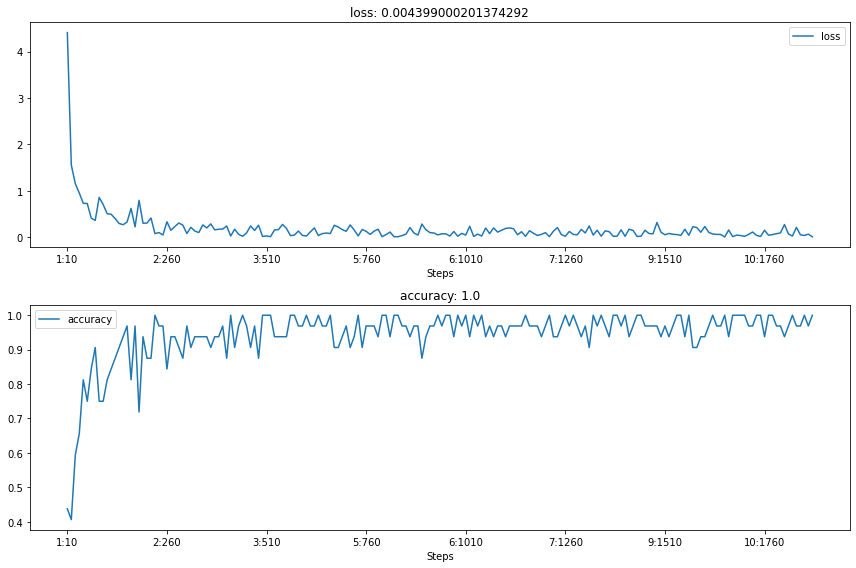

In [ ]:
#--- Entrenamos la CNN

from sklearn.metrics import f1_score

n_epoch = 10

history = hl.History()
canvas = hl.Canvas()

iter = 0

for epoch in range(n_epoch):
  for batch_id, (X_train_batch, Y_train_batch) in enumerate(train_dl):
    model.train()
    #print(X_train_batch.size())
    Xtr = X_train_batch.unsqueeze(1)
    #print(Xtr.size())
    Y_pred = model(Xtr)

    loss = criterion(Y_pred,Y_train_batch)

    Y_pred = torch.argmax(Y_pred, 1)
    f1 = f1_score(Y_train_batch, Y_pred, average='macro')    

    acc = sum(Y_train_batch == Y_pred)/len(Y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    iter += 1

    if iter%10 == 0:
        #-- Visualizamos la evolución de los score loss y accuracy
        history.log((epoch+1, iter), loss=loss, accuracy=acc)
        with canvas:
          canvas.draw_plot(history["loss"])
          canvas.draw_plot(history["accuracy"])

# Visualizando algunos mapas de características

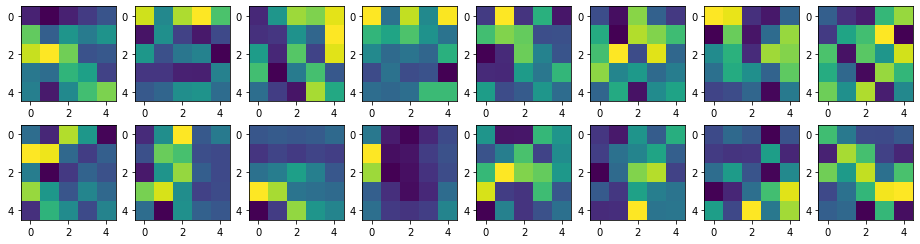

In [ ]:
#-- Visualizando los mapas de características de la primera capa convolucional
kernels = list(model.children())[0].weight.detach()

fig = plt.figure(figsize=(16,4))
k = 0
for i in range(kernels.size(0)):
    plt.subplot(2,8,k+1)
    plt.imshow(kernels[i].squeeze())
    k += 1
plt.show()

In [ ]:
#-- Evaluamos el modelo con nuestro set de validación

model.eval()
Xvl = X_valid.unsqueeze(1)
Y_pred = model(Xvl)  
loss = criterion(Y_pred,Y_valid)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_valid, Y_pred, average='macro')

acc = sum(Y_valid == Y_pred)/len(Y_pred)

print( 'Loss:{:.2f}, F1:{:.2f}, Acc:{:.2f}'.format(loss.item(), f1, acc ) )

Loss:0.09, F1:0.97, Acc:0.97


# Usando la GPU

In [ ]:
#-- Después de activar el entorno GPU se selecciona el dispositivo

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
#--- Definimos el modelo

model = torch.nn.Sequential(
  torch.nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
  #out: ( (28-5+2*2)/1 ) + 1 = 28   -> 28 x 28 x16

  torch.nn.ReLU(),

  torch.nn.MaxPool2d(kernel_size=2),
  #out: 28/2 = 14                 -> 14 x 14 x 16

  torch.nn.Dropout(p=0.2), 

  torch.nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
  #out: ( (14-5+2*2)/1 ) + 1 = 14   -> 14 x 14 x 32

  torch.nn.ReLU(),

  torch.nn.MaxPool2d(kernel_size=2),
  #out: 14/2 = 7                 -> 7 x 7 x 32

  torch.nn.Dropout(p=0.2), 

  torch.nn.Flatten(),
  torch.nn.Linear(7*7*32, 10)
)
model

Sequential(
  (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Dropout(p=0.2, inplace=False)
  (4): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (5): ReLU()
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Dropout(p=0.2, inplace=False)
  (8): Flatten(start_dim=1, end_dim=-1)
  (9): Linear(in_features=1568, out_features=10, bias=True)
)

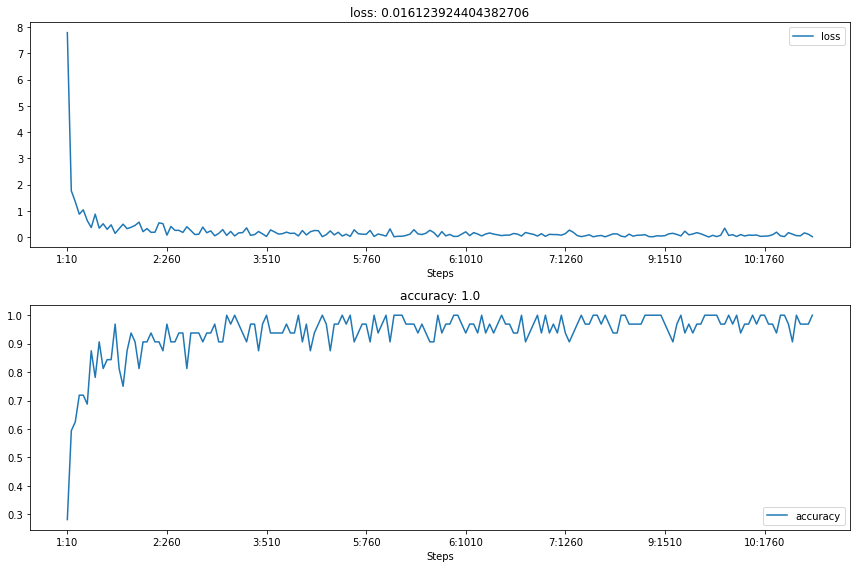

In [ ]:

#-- Cargamos el modelo en la GPU
model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001, weight_decay=0.1)

n_epoch = 10

history2 = hl.History()
canvas2 = hl.Canvas()

iter = 0

for epoch in range(n_epoch):
  for batch_id, (X_train_batch, Y_train_batch) in enumerate(train_dl):

    #-- Cargamos los datos en la GPU
    X_train_batch, Y_train_batch = X_train_batch.to(device), Y_train_batch.to(device)

    model.train()
    Xtr = X_train_batch.unsqueeze(1)
    Y_pred = model(Xtr)

    loss = criterion(Y_pred,Y_train_batch)

    Y_pred = torch.argmax(Y_pred, 1)

    #-- Calculamos el f1 en la cpu
    f1 = f1_score(Y_train_batch.cpu(),Y_pred.cpu(), average='macro')

    acc = sum(Y_train_batch == Y_pred)/len(Y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    iter += 1

    if iter%10 == 0:
        history2.log((epoch+1, iter), loss=loss, accuracy=acc)
        with canvas2:
          canvas2.draw_plot(history2["loss"])
          canvas2.draw_plot(history2["accuracy"])

In [ ]:
#-- Validamos el modelo

X_valid, Y_valid = X_valid.to(device), Y_valid.to(device)
model.eval()
Xvl = X_valid.unsqueeze(1)
Y_pred = model(Xvl)  
loss = criterion(Y_pred,Y_valid)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_valid.cpu(), Y_pred.cpu(), average='macro')

acc = sum(Y_valid == Y_pred)/len(Y_pred)

print( 'Loss:{:.2f}, F1:{:.2f}, Acc:{:.2f}'.format(loss.item(), f1, acc ) )

Loss:0.08, F1:0.98, Acc:0.98


## Lectura Recomendada

[Visualizing and Understanding Convolutional Networks](https://arxiv.org/abs/1311.2901)